In [52]:
import pandas as pd
import numpy as np
import re
import nltk



In [53]:
data = {
    
    'tweet': [
        "COVID cases are rising in our city! Stay safe everyone.",
        "Got my vaccine today, feeling relieved.",
        "Hospitals are overwhelmed due to the pandemic.",
        "Wearing masks helps reduce the spread.",
        "No signs of COVID in our area yet.",
        "Another lockdown announced due to rising cases.",
        "Stay home, stay safe.",
        "The new variant is spreading fast.",
        "Testing centers are full.",
        "Recovered from COVID last month."
    ],
    'outbreak_risk': [1, 0, 1, 1, 0, 1, 1, 1, 1, 0]
}
df=pd.DataFrame(data)
df.head()

,tweet,outbreak_risk
0,COVID cases are rising in our city! Stay safe ...,1
1,"Got my vaccine today, feeling relieved.",0
2,Hospitals are overwhelmed due to the pandemic.,1
3,Wearing masks helps reduce the spread.,1
4,No signs of COVID in our area yet.,0


In [54]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
def tokenizer_and_lemmatize(tweet):
    tokens=word_tokenize(tweet)
    stop_words=set(stopwords.words('english'))
    tokens=[word for word in tokens if word not in stop_words]
    lemmatizer=WordNetLemmatizer()
    tokens=[lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)

df['preprocessed_tweet']=df['tweet'].apply(tokenizer_and_lemmatize)
df.head()

,tweet,outbreak_risk,preprocessed_tweet
0,COVID cases are rising in our city! Stay safe ...,1,COVID case rising city ! Stay safe everyone .
1,"Got my vaccine today, feeling relieved.",0,"Got vaccine today , feeling relieved ."
2,Hospitals are overwhelmed due to the pandemic.,1,Hospitals overwhelmed due pandemic .
3,Wearing masks helps reduce the spread.,1,Wearing mask help reduce spread .
4,No signs of COVID in our area yet.,0,No sign COVID area yet .


In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=100)
X=tfidf.fit_transform(df['preprocessed_tweet']).toarray()
y=df['outbreak_risk']



In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [63]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.5


In [66]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(df['preprocessed_tweet'])
X = tokenizer.texts_to_sequences(df['preprocessed_tweet'])
X = pad_sequences(X, maxlen=20) # Pad to length 20
y = df['outbreak_risk'].values

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [73]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
model=Sequential([
    Embedding(input_dim=5000, output_dim=64, input_length=20),
    LSTM(64,return_sequences=False),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.build(input_shape=(None,20))

history=model.fit(X_train, y_train, epochs=10, validation_data=(X_test,y_test), batch_size=2, verbose=0)


In [68]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print("Test Accuracy:", accuracy_score(y_test, y_pred))

1/1 [==============================] - 1s 776ms/step
Test Accuracy: 0.5


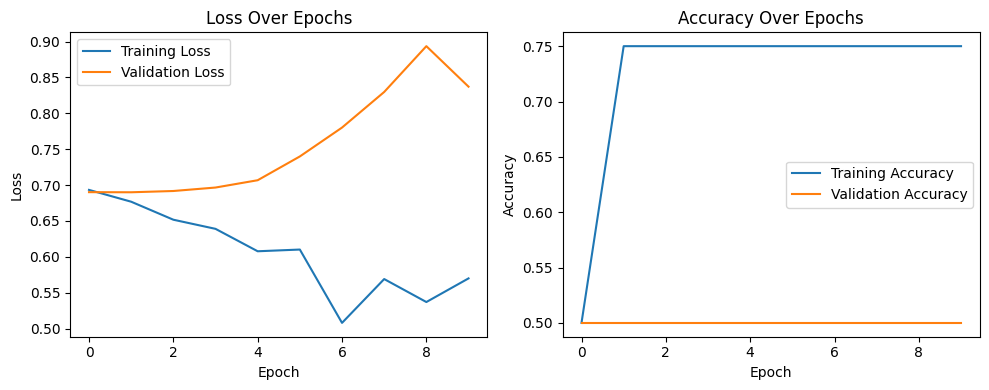

In [69]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
# Plot Training & Validation Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()